In [9]:
import sys
sys.path.append("..")

import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
import importlib
import consts
importlib.reload(consts)
from preceding_events import get_events_beofore_dose


In [10]:
inputevets_filtered = pd.read_csv("..\\filtered\\input_events_filtered_by_subject_id_and_medicine.csv")
chartevents_filtered = pd.read_csv("..\\filtered\\filtered_chartevents.csv")
icustays_filtered = pd.read_csv("..\\filtered\\filtered_icustays.csv")
patients_filtered = pd.read_csv("..\\filtered\\filtered_patients.csv")
procedureevents_filtered = pd.read_csv("..\\filtered\\filtered_procedureevents.csv")
labevents_filtered = pd.read_csv("..\\filtered\\filtered_labevents.csv")
transfers_filtered = pd.read_csv("..\\filtered\\filtered_transfers.csv")
itemid = pd.read_csv("..\\data\\icu\\d_items.csv")

In [17]:
tmp = inputevets_filtered.sample(100000)

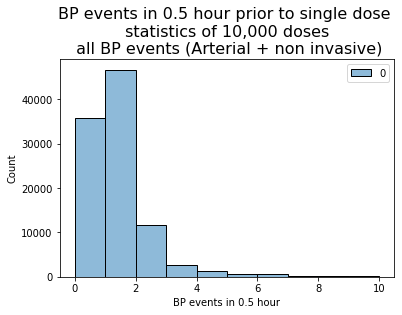

1     46.674
0     35.837
2     11.686
3      2.624
4      1.306
6      0.556
5      0.547
7      0.281
8      0.140
9      0.080
10     0.047
12     0.045
11     0.041
13     0.031
14     0.024
15     0.016
16     0.014
17     0.011
20     0.006
21     0.006
18     0.005
24     0.005
19     0.003
26     0.003
30     0.003
22     0.002
23     0.002
31     0.002
25     0.001
27     0.001
47     0.001
dtype: float64


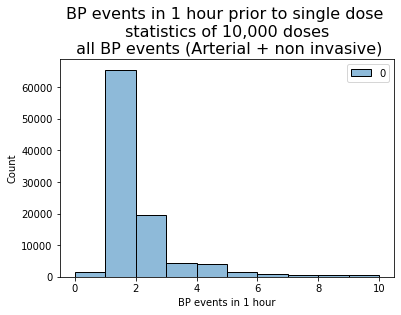

1     65.495
2     19.692
3      4.381
4      4.077
5      1.534
0      1.532
6      0.972
7      0.564
8      0.512
9      0.282
10     0.243
11     0.164
12     0.149
13     0.089
14     0.074
15     0.038
17     0.032
16     0.024
18     0.022
20     0.014
26     0.013
22     0.013
19     0.013
21     0.011
23     0.008
24     0.008
27     0.007
29     0.007
25     0.005
30     0.004
31     0.003
35     0.003
43     0.002
33     0.002
28     0.002
32     0.001
37     0.001
38     0.001
41     0.001
42     0.001
47     0.001
57     0.001
59     0.001
60     0.001
dtype: float64


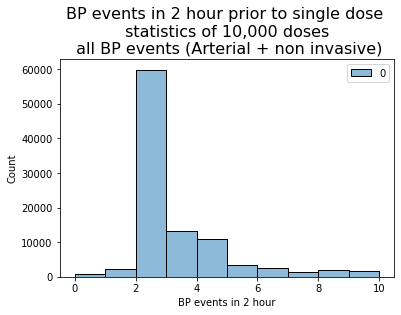

2     59.772
3     13.355
4     10.768
5      3.318
6      2.482
1      2.191
8      1.934
7      1.421
9      0.921
0      0.895
10     0.648
11     0.431
12     0.372
13     0.282
14     0.224
16     0.186
15     0.161
18     0.104
17     0.094
20     0.061
19     0.054
21     0.041
22     0.040
24     0.036
23     0.033
25     0.026
27     0.016
28     0.016
32     0.015
26     0.015
29     0.010
30     0.010
31     0.008
34     0.008
35     0.006
36     0.006
42     0.005
33     0.004
38     0.004
40     0.003
62     0.002
51     0.002
48     0.002
47     0.002
45     0.002
37     0.002
46     0.001
43     0.001
41     0.001
49     0.001
39     0.001
54     0.001
58     0.001
61     0.001
66     0.001
67     0.001
78     0.001
79     0.001
dtype: float64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for period, color in zip([0.5, 1, 2],["red","blue", "orange"]):
    counts_lst = []
    for row in range(tmp.shape[0]):
        dose_preceding_results = get_events_beofore_dose(tmp.iloc[row]["starttime"], period, tmp.iloc[row]["stay_id"], chartevents_filtered, "charttime")
        results_count = dose_preceding_results[dose_preceding_results["itemid_label"] != "Heart Rate"].shape[0]
        counts_lst.append(results_count)
        
    sns.histplot(pd.DataFrame(counts_lst), binrange=[0,10], bins=10, color=color)
    plt.title(f"BP events in {str(period)} hour prior to single dose \n statistics of 10,000 doses \n all BP events (Arterial + non invasive)", fontsize=16)
    plt.xlabel(f"BP events in {str(period)} hour")
    plt.savefig(f"../plots/BP_events_in_{str(period)}_hour_prior_to_dose.png")
    plt.show()
    # prints the probability to each BP count
    print(pd.DataFrame(counts_lst).value_counts(normalize=True) *100)

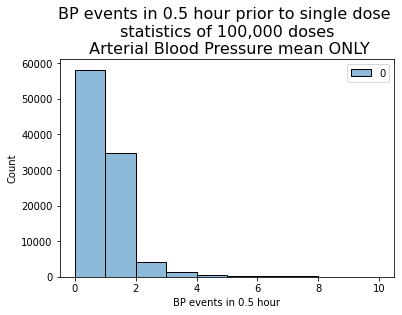

0     58.112
1     34.775
2      4.274
3      1.340
4      0.529
6      0.314
5      0.248
7      0.174
8      0.052
9      0.040
10     0.027
12     0.021
11     0.017
13     0.016
15     0.014
14     0.011
16     0.007
17     0.006
19     0.005
21     0.003
30     0.003
18     0.002
20     0.002
24     0.002
26     0.002
31     0.002
22     0.001
27     0.001
dtype: float64


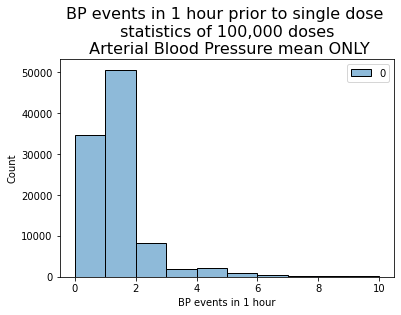

1     50.567
0     34.555
2      8.345
4      2.178
3      1.991
5      0.882
6      0.413
7      0.260
8      0.205
9      0.146
10     0.120
12     0.080
11     0.069
13     0.051
14     0.027
17     0.014
15     0.014
19     0.009
16     0.009
20     0.008
18     0.007
21     0.007
26     0.007
24     0.006
29     0.005
25     0.004
22     0.004
32     0.003
35     0.003
23     0.002
37     0.002
27     0.001
31     0.001
41     0.001
42     0.001
43     0.001
55     0.001
60     0.001
dtype: float64


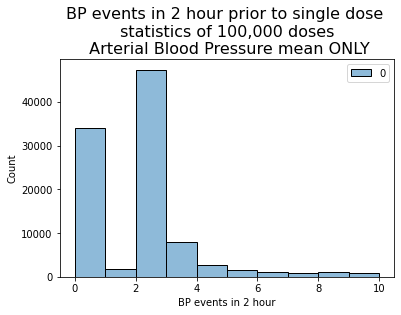

2     47.326
0     33.963
3      8.048
4      2.658
1      1.778
5      1.555
6      1.098
8      1.052
7      0.771
9      0.514
10     0.279
11     0.209
12     0.147
13     0.133
14     0.096
15     0.059
16     0.047
18     0.040
17     0.032
19     0.032
24     0.018
22     0.017
25     0.017
21     0.017
20     0.015
23     0.013
27     0.010
31     0.007
32     0.006
34     0.006
28     0.005
36     0.003
42     0.003
30     0.002
29     0.002
33     0.002
35     0.002
26     0.002
38     0.002
43     0.002
62     0.002
54     0.001
66     0.001
65     0.001
58     0.001
37     0.001
51     0.001
47     0.001
45     0.001
40     0.001
78     0.001
dtype: float64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
for period, color in zip([0.5, 1, 2],["red","blue", "orange"]):
    counts_lst = []
    for row in range(tmp.shape[0]):
        dose_preceding_results = get_events_beofore_dose(tmp.iloc[row]["starttime"], period, tmp.iloc[row]["stay_id"], chartevents_filtered, "charttime")
        results_count = dose_preceding_results[dose_preceding_results["itemid_label"] == "Arterial Blood Pressure mean"].shape[0]
        counts_lst.append(results_count)
        
    sns.histplot(pd.DataFrame(counts_lst), binrange=[0,10], bins=10, color=color)
    plt.title(f"BP events in {str(period)} hour prior to single dose \n statistics of 100,000 doses \n Arterial Blood Pressure mean ONLY", fontsize=16)
    plt.xlabel(f"BP events in {str(period)} hour")
    plt.savefig(f"../plots/Arterial_Blood_Pressure_mean_events_in_{str(period)}_hour_prior_to_dose.png")
    plt.show()
    # prints the probability to each BP count
    print(pd.DataFrame(counts_lst).value_counts(normalize=True) *100)